<a href="https://colab.research.google.com/github/Kabshah/smit-notebooks/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###

### Data

In [ ]:
df = pd.read_csv('car_evaluation.csv', header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.shape

(1728, 7)

### Apply column names

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


###

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:

    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

### Explore class variable¶

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

###

### Missing values in variables

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset.

### Split data to x and y

In [ ]:
x = df.drop(['class'], axis=1)
y = df['class']

###

### Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

### Feature Engineering

In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode categorical variables<br>
Now, I will encode the categorical variables.

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


We can see that all the variables are ordinal categorical data type.

###

In [ ]:
pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 572.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import category_encoders as ce

In [ ]:
# encoder = ce.OrdinalEncoder(
#     cols=['safety'],
#     mapping=[{'col': 'safety', 'mapping': {'low': 1, 'med': 2, 'high': 3}}]
# )


In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


We now have training and test set ready for model building.

### Apply Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=8)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
y_pred

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'vgood', 'good', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'good', 'vgood', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'good', 'good', 'unacc',
       'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc',
       'good', 'acc', 'unacc', 'acc', 'good', 'acc', 'unacc', 'good',
       'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good', 'acc',
  

Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.9422


### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(DT.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(DT.score(X_test, y_test)))

Training set score: 0.9327
Test set score: 0.9422


These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.3628048780487805, 0.9444444444444444, 'X[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.3384146341463415, 0.8333333333333334, 'X[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.31402439024390244, 0.7222222222222222, 'X[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.0975609756097561, 0.6111111111111112, 'X[0] <= 1.5\nentropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.07317073170731707, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37, 0]'),
 Text(0.12195121951219512, 0.5, 'X[0] <= 3.5\nentropy = 0.999\nsamples = 112\nvalue = [54, 0, 58, 0]'),
 Text(0.0975609756097561, 0.3888888888888889, 'X[5] <= 1.5\nentropy = 0.868\nsamples = 76\nvalue = [54, 0, 22, 0]'),
 Text(0.04878048780487805, 0.2777777777777778, 'X[2] <= 3.5\nentropy = 0.286\nsamples = 40\nvalue = [38, 0, 2, 0]'),
 Text(0.024390243902439025, 0.16666666666666666, 'entropy = 0.0\nsamples = 30\nvalue = [3

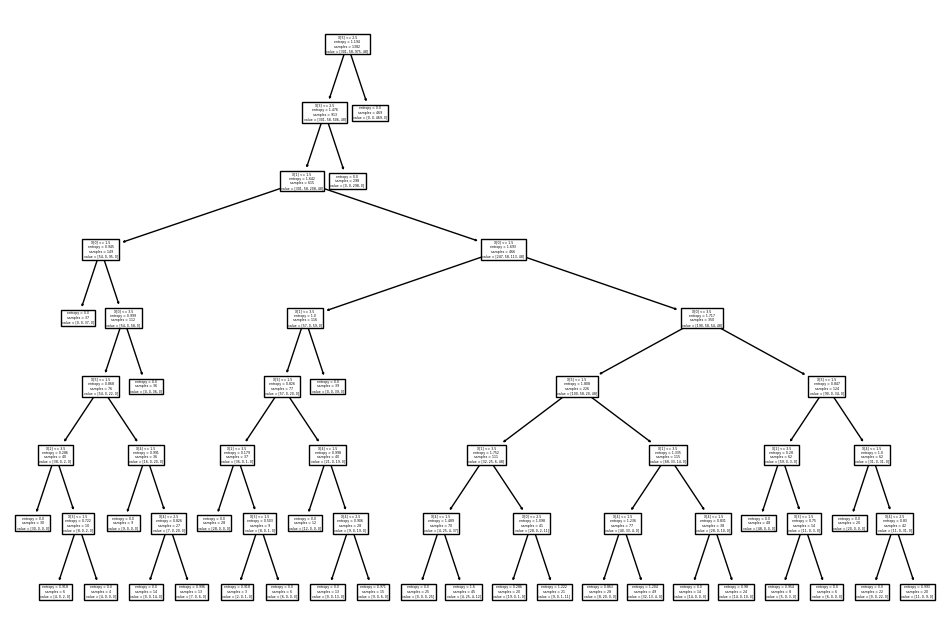

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(DT.fit(X_train, y_train))

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 76   6   0   1]
 [  2   9   0   0]
 [  3   0 232   0]
 [  0   8   0   9]]


###  

### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.92      0.93        83
        good       0.39      0.82      0.53        11
       unacc       1.00      0.99      0.99       235
       vgood       0.90      0.53      0.67        17

    accuracy                           0.94       346
   macro avg       0.81      0.81      0.78       346
weighted avg       0.96      0.94      0.95       346

